In [7]:
import networkx as nx
import igraph as igraph
import community
import pandas as pd
import numpy as np
from networkx.readwrite import json_graph
import json
import codecs
import csv
import ast

In [20]:
with open('../input_data/annotazioni/ILENIA_2019-m11-d25-h12-m46-s35.json', 'r', encoding='utf-8') as json_data:
    parsed_json1 = (json.loads(json_data.read()))
    terminology_set1 = set()
    for internal_dic in parsed_json1["savedInsertedRelations"]:
        terminology_set1.add(internal_dic["prerequisite"])
        terminology_set1.add(internal_dic["advanced"])
    print('# of prereq rel:', len(parsed_json1["savedInsertedRelations"]))
    print('terminology len:',len(terminology_set1))
    
    networkx_graph1 = nx.DiGraph()
    igraph_graph1 = igraph.Graph(directed=True)
    
    # The nodes are only the nodes used in the relations
    '''
    networkx_graph1.add_nodes_from(terminology_set1)
    igraph_graph1.add_vertices(terminology_set1)
    terminology_list1 = list(terminology_set1)
    '''
    
    # The nodes are the combined terminology
    networkx_graph1.add_nodes_from(terminology_set1)
    igraph_graph1.add_vertices(terminology_set1)
    terminology_list1 = list(terminology_set1)
    
    for internal_dic in parsed_json1["savedInsertedRelations"]:
        prereq = internal_dic["prerequisite"]
        subsid = internal_dic["advanced"]
        networkx_graph1.add_edge(prereq, subsid)
        igraph_graph1.add_edge(terminology_list1.index(prereq), terminology_list1.index(subsid))
        
with open('../input_data/annotazioni2/test2.json', 'r', encoding='utf-8') as json_data:
    parsed_json2 = (json.loads(json_data.read()))
    terminology_set2 = set()
    for internal_dic in parsed_json2["savedInsertedRelations"]:
        terminology_set2.add(internal_dic["prerequisite"])
        terminology_set2.add(internal_dic["advanced"])
    print('# of prereq rel:', len(parsed_json2["savedInsertedRelations"]))
    print('terminology len:',len(terminology_set2))
    
    networkx_graph2 = nx.DiGraph()
    igraph_graph2 = igraph.Graph(directed=True)
    
    '''
    networkx_graph2.add_nodes_from(terminology_set2)
    igraph_graph2.add_vertices(terminology_set2)
    terminology_list2 = list(terminology_set2)'''
    
    networkx_graph2.add_nodes_from(terminology_set2)
    igraph_graph2.add_vertices(terminology_set2)
    terminology_list2 = list(terminology_set2)
    
    for internal_dic in parsed_json2["savedInsertedRelations"]:
        prereq = internal_dic["prerequisite"]
        subsid = internal_dic["advanced"]
        networkx_graph2.add_edge(prereq, subsid)
        igraph_graph2.add_edge(terminology_list2.index(prereq), terminology_list2.index(subsid))
        

# of prereq rel: 92
terminology len: 96
# of prereq rel: 13
terminology len: 11


networkx_graph1.size() 15


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

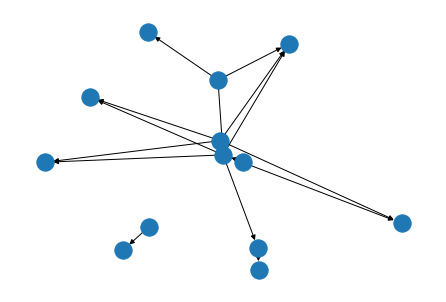

In [27]:
nx.draw(networkx_graph1)
print("networkx_graph1.size()",networkx_graph1.size())
igraph.Graph.summary(igraph_graph1)
betweenness_dict = nx.betweenness_centrality(networkx_graph1) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(networkx_graph1) # Run eigenvector centrality

communities = community.greedy_modularity_communities(networkx_graph1)
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')
'''
# Assign each to an attribute in your network
nx.set_node_attributes(networkx_graph1, betweenness_dict, 'betweenness')
nx.set_node_attributes(networkx_graph1, eigenvector_dict, 'eigenvector')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)
'''

In [23]:
def detect_transitive_edges(graph, cutoff, find_also_not_inserted=False):
 
        # Detect transitive relations manually inserted by the annotator.
        # If "find_also_not_inserted", the algorithm searches also all the
        # potential transitives in the graph (before a cutoff).
        # 
        # INPUT:
        # graph
        # cutoff: an int number of edges, after which the searching algorithm stops.
        # 
        # OUTPUT
        # A dict with transitives,
        # indexed whether they have been manually inserted by the annotator
        # or automatically detected in the graph by the search algorithm.
        
    transitives = {'manually inserted': [],
                    'automatically detected': []}
        
    if cutoff > 14:
        cutoff = 14
    
    for source_node in graph.nodes():
        other_nodes = list(graph.nodes())
        # print(other_nodes)
        other_nodes.remove(source_node)
    
        for target_node in other_nodes:
            paths = nx.all_simple_paths(graph, source_node, target_node, cutoff)
            # print(type(paths))
            # print(list(paths))
            
            for path in paths:
                # print(path)
                if len(path)>2 and graph.has_edge(source_node, target_node): 
                    print("manually inserted:",source_node,target_node)
                    if (source_node, target_node) not in transitives['manually inserted']:
                        print("manually inserted:",source_node,target_node)
                        transitives['manually inserted'].append((source_node, target_node))
                        
                    else:
                        if find_also_not_inserted:
                                print("automatically detected:",source_node,target_node)
                                if (source_node, target_node) not in transitives['automatically detected']:
                                    transitives['automatically detected'].append((source_node, target_node))
                        
    return transitives
# len(nx.dominating_set(networkx_graph1))
# detect_clusters(igraph_graph1)
# plot_clusters(igraph_graph1)
transitive_result = detect_transitive_edges(networkx_graph1, 14, False)
len(transitive_result['manually inserted'])
with open('transitive-ilenia.csv', 'w') as f:
    for el in transitive_result['manually inserted']:
        f.write("%s,%s\n" % el)
# print(transitive_dict)

networkx_graph1.size() 91
clusters: [94, 93, 92, 89, 88, 87, 86, 85, 84, 83, 82, 78, 29, 28, 66, 27, 26, 60, 62, 65, 48, 47, 50, 55, 23, 33, 74, 63, 22, 81, 73, 21, 58, 52, 32, 77, 76, 49, 59, 75, 44, 54, 72, 30, 20, 19, 53, 41, 25, 18, 16, 15, 13, 95, 17, 10, 12, 7, 24, 5, 71, 64, 8, 14, 70, 90, 51, 57, 69, 6, 43, 4, 80, 67, 3, 42, 61, 56, 68, 2, 46, 9, 40, 45, 1, 39, 31, 0, 91, 79, 37, 11, 36, 38, 35, 34]
betweenness: [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 53.0, 0.0, 26.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 52.0, 30.0, 2.0, 105.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.0, 72.0, 0.0, 0.0, 0.0, 0.0, 6.0, 20.0, 0.0, 0.0, 2.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.0, 0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0]
is simple  False
is is_bipartite  True


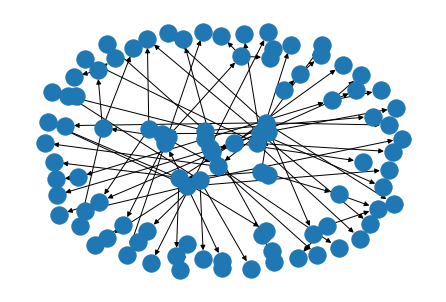

In [24]:
nx.draw(networkx_graph1)
print("networkx_graph1.size()",networkx_graph1.size())
igraph.Graph.summary(igraph_graph1)

print("clusters:",igraph.GraphBase.clusters(igraph_graph1,mode='STRONG'))
print("betweenness:",igraph_graph1.betweenness(vertices=None, directed=True, cutoff=None, weights=None, nobigint=True))

print("is simple ",igraph.GraphBase.is_simple(igraph_graph1)) # Checks whether the graph is simple (no loop or multiple edges).
print("is is_bipartite ", igraph.GraphBase.is_bipartite(igraph_graph1))
# igraph_graph1.authority_score(weights=None, scale=True, arpack_options=None, return_eigenvalue=False)

In [25]:
# len(igraph_graph1.es)print('# of prereq rel:', len(parsed_json1["saved
# DiGM = nx.isomorphism.DiGraphMatcher(networkx_graph1,networkx_graph2)
GM = nx.algorithms.isomorphism.GraphMatcher(networkx_graph1,networkx_graph2)
print("GM.subgraph_is_isomorphic()",GM.subgraph_is_isomorphic())
# print(nx.algorithms.isomorphism.subgraph_is_isomorphic())

GM.subgraph_is_isomorphic() False


In [26]:
igraph.GraphBase.isomorphic_vf2(igraph_graph1,igraph_graph2)

False

In [27]:
igraph.GraphBase.coreness(mode='ALL')


TypeError: descriptor 'coreness' of 'igraph.Graph' object needs an argument

In [28]:
igraph.Clustering.as_cover(igraph_graph1)

AttributeError: 'Graph' object has no attribute '_graph'

In [29]:
GM2 = nx.algorithms.isomorphism.GraphMatcher(networkx_graph2,networkx_graph1)
for subgraph in GM2.subgraph_isomorphisms_iter():
    print("subgraph", len(subgraph))

In [ ]:
for v in nx.optimize_graph_edit_distance(networkx_graph1,networkx_graph2,node_match=lambda a,b: a == b):
    print("optimize_graph_edit_distance:",v)

optimize_graph_edit_distance: 187.0
optimize_graph_edit_distance: 185.0
optimize_graph_edit_distance: 183.0


In [ ]:
for dist in nx.algorithms.similarity.optimize_graph_edit_distance(networkx_graph1,networkx_graph2, node_match=lambda a,b: a == b):
    print(dist)


In [ ]:
## Calculate Triangles

In [ ]:
# function to calculate the number of triangles in a simple 
# directed/undirected graph. 
# isDirected is true if the graph is directed, its false otherwise 
def countTriangle(g, isDirected): 
    nodes = len(g) 
    count_Triangle = 0 #Initialize result 
    # Consider every possible triplet of edges in graph 
    for i in range(nodes): 
        for j in range(nodes): 
            for k in range(nodes): 
                # check the triplet if it satisfies the condition 
                if( i!=j and i !=k and j !=k and 
                        g[i][j] and g[j][k] and g[k][i]): 
                    count_Triangle += 1
    # if graph is directed , division is done by 3 
    # else division by 6 is done 
    return count_Triangle/3 if isDirected else count_Triangle/6

countTriangle(networkx_graph1, True)



In [ ]:
igraph.GraphBase.articulation_points(igraph_graph1)

In [ ]:
igraph_graph1.articulation_points()


In [ ]:
igraph.Clustering.summary(igraph_graph1)
